<a href="https://colab.research.google.com/github/vadim-privalov/Neiroset_Novosibirsk/blob/main/%D0%98%D0%B7%D0%BC%D0%B5%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5_%D1%8F%D1%80%D0%BA%D0%BE%D1%81%D1%82%D0%B8_%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="text-align: center;">Изменение яркости изображений</b></h1>

В этом уроке научимся изменять яркость изображения.

In [ ]:
# import the necessary packages
# импортируем необходимые модули
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Загрузка файлов

In [ ]:
!wget http://dataudt.ru/datasets/cv/Lesson_09.Brightness.zip
!unzip Lesson_09.Brightness.zip
%cd /content/Lesson_09.Brightness

--2022-01-26 17:54:30--  http://dataudt.ru/datasets/cv/Lesson_09.Brightness.zip
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4717069 (4.5M) [application/zip]
Saving to: ‘Lesson_09.Brightness.zip’

Lesson_09.Brightnes 100%[===================>]   4.50M  4.15MB/s    in 1.1s    

2022-01-26 17:54:31 (4.15 MB/s) - ‘Lesson_09.Brightness.zip’ saved [4717069/4717069]

Archive:  Lesson_09.Brightness.zip
  inflating: Lesson_09.Brightness/Bright_and_dark.py  
  inflating: Lesson_09.Brightness/elephants.png  
  inflating: Lesson_09.Brightness/giraffe.png  
  inflating: Lesson_09.Brightness/tigers.png  
  inflating: Lesson_09.Brightness/zebra.png  
/content/Lesson_09.Brightness


In [ ]:
# construct the argument parser and parse the arguments
# создадим парсер и укажем аргументы
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True, help="Path to the image")
# args = vars(ap.parse_args())
# пока мы используем Jupyter Notebooks мы можем заменить наш парсер
# явными аргументами и значениями
args = {
	"image": "/content/Lesson_09.Brightness/zebra.png",

}

Text(0.5, 1.0, 'Original')

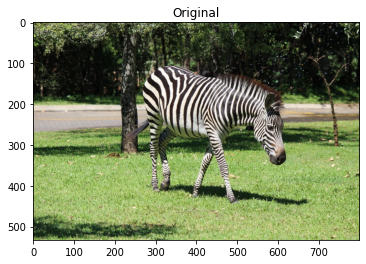

In [ ]:
# load the image and show it
# загрузим изображение и покажем его
image = cv2.imread("zebra.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title("Original")

max of 255: [[255]]
min of 0: [[0]]
wrap around: [44]
wrap around: [206]


Text(0.5, 1.0, 'Added')

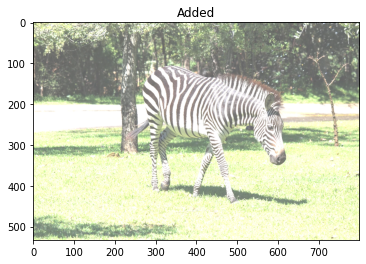

In [ ]:
# images are NumPy arrays, stored as unsigned 8 bit integers -- this
# that the values of our pixels will be in the range [0, 255]; when
# using functions like cv2.add and cv2.subtract, values will be clipped
# to this range, even if the added or subtracted values fall outside the
# range of [0, 255]. Check out an example:
# изображения представляют собой массивы NumPy, 
# хранящиеся как 8-битные целые числа без знака - это то,
# что значения наших пикселей будут в диапазоне [0, 255]; 
# при использовании таких функций, как cv2.add и cv2.subtract,
# значения будут обрезаны до этого диапазона, 
# даже если добавленные или вычтенные значения выходят
# за пределы диапазона [0, 255]. Посмотрите пример:
print("max of 255: {}".format(str(cv2.add(np.uint8([200]), np.uint8([100])))))
print("min of 0: {}".format(str(cv2.subtract(np.uint8([50]), np.uint8([100])))))

# NOTE: if you use NumPy arithmetic operations on these arrays, the value
# will be modulos (wrap around) instead of being  clipped to the [0, 255]
# range. This is important to keep in mind when working with images.
# ПРИМЕЧАНИЕ: если вы используете арифметические операции NumPy
# с этими массивами, значение будет по модулю (циклическое)
# вместо того, чтобы быть обрезанным до диапазона [0, 255].
# Об этом важно помнить при работе с изображениями.
print("wrap around: {}".format(str(np.uint8([200]) + np.uint8([100]))))
print("wrap around: {}".format(str(np.uint8([50]) - np.uint8([100]))))

# let's increase the intensity of all pixels in our image by 100 -- we
# accomplish this by constructing a NumPy array that is the same size of
# our matrix (filled with ones) and the multiplying it by 100 to create an
# array filled with 100's, then we simply add the images together; notice
# how the image is "brighter"
# давайте увеличим интенсивность всех пикселей в нашем 
# изображении на 100. Для этого создадим массив NumPy, 
# который имеет тот же размер нашей матрицы (заполненный единицами),
# и умножим его на 100, чтобы создать массив, заполненный сотнями,
# затем мы просто складываем изображения вместе; 
# обратите внимание, насколько изображение «ярче»
M = np.ones(image.shape, dtype = "uint8") * 100
added = cv2.add(image, M)
plt.imshow(added)
plt.title('Added')

Text(0.5, 1.0, '"Subtracted"')

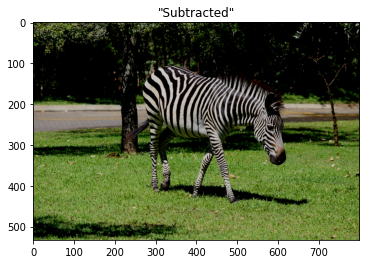

In [ ]:
# similarly, we can subtract 50 from all pixels in our image and make it
# darker
# аналогично, мы можем вычесть 50 из значений всех пикселей
# в нашем изображении и сделать его темнее
M = np.ones(image.shape, dtype = "uint8") * 50
subtracted = cv2.subtract(image, M)
plt.imshow(subtracted)
plt.title('"Subtracted"')